# **Alternus Vera**
## **SJSU ID:** 013752622                        
## **Name:** Anand Muralidhara
## **Team Transformers**
## **Factor:** Source Credibility
Fake news is a form of news that consists of deliberate disinformation or hoaxes that are spread through traditional news media (print and broadcast) or social media online. Digital news has brought the use of fake news, or yellow journalism, back and increased. The news is then often reverberated in social media as misinformation, but sometimes it also finds its way to the mainstream media.

Credibility of a news source plays a huge role in accessing and analysing fake news. In the given dataset, the “context” column has been chosen to be the area of interest. This label hold data of the news source, which gives an insight to the exact origin of the news. The tracking down of the news source first point of news analysis and help narrow down the genuity of the news itself. 

**Dataset used:** 


*   Liar Liar Dataset
*   Kaggle Fake News
*   UCI News

# **Final Sprint Updates:**


- Worked on integrating my factor with the Alternus Vera Iteration 1 notebook shared by Professor. For Integration,  I imported the python class file, factor class from the shared drive into the consolidated notebook. By loading my pickled model, I predicted whether the given news statement was true or fake.

- Add more visualizations

- Updated the notebook to mention steps for Machine Learning Lifecycle.

- Worked on Polynomial Equation with all team factors.

# **Machine Learning LifeCycle**

# **1. Configuration of the System : Iterative, Notebook, code structure, data, where will it reside, folders, cloud buckets etc.**

#### **Datasets:**
https://drive.google.com/open?id=1qmuYYbjt8JUJn-RG_LfJNzDsU-eFMHun

* Liar Liar
* Kaggle Fake News
* UCI News

#### **Team Colab Notebook with factors integrated**
https://colab.research.google.com/drive/1blYS_E0L5NSN1mo4nwnh_rK3pAzCYDLg
#### **Notebook for Team Polynomial Equation**
https://colab.research.google.com/drive/19oz5usXeid7pWX1zDmB01KhQfe_ADnWc
#### **Reasearch Paper**
https://drive.google.com/file/d/1Bk0_YK9sazh8z9pKnRn3Azmw6WgoCRJ4/view?usp=sharing

# **2. Data Collection**
The data source used for this project is LIAR dataset which contains 3 files with .tsv format for test, train and validation. Below is some description about the data files used for this project.



> LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION



William Yang Wang, “Liar, Liar Pants on Fire”: A New Benchmark Dataset for Fake News Detection, to appear in Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL 2017), short paper, Vancouver, BC, Canada, July 30-August 4, ACL.

the original dataset contained 13 variables/columns for train, test and validation sets as follows:

* Column 1: the ID of the statement ([ID].json).
* Column 2: the label. (Label class contains: True, Mostly-true, Half-true, Barely-true, FALSE, Pants-fire)
* Column 3: the statement.
* Column 4: the subject(s).
* Column 5: the speaker.
* Column 6: the speaker’s job title.
* Column 7: the state info.
* Column 8: the party affiliation.
* Column 9-13: the total credit history count, including the current statement.
- 9: barely true counts.
- 10: false counts.
- 11: half true counts.
- 12: mostly true counts.
- 13: pants on fire counts.
* Column 14: the context (venue / location of the speech or statement).

# **3. Exploratory Data Analysis and Visualization**

## Data Exploration
Import required libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

path_train = '/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Anand/train.tsv'
path_test ='/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Anand/test.tsv'
path_valid ='/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Anand/valid.tsv'
# path_fake ='/content/drive/My Drive/AlternusVeraDatasets2019/Transformers/Anand/fake.csv'
path_news ='/content/drive/My Drive/AlternusVeraDatasets2019/Transformers/Anand/uci-news-aggregator.xlsx'

columnNames = ['id', 'label', 'statement', 'subject', 'speaker', 'speaker_job_title', 'state_info','party_affiliation', 'barely_true_counts', 'false_counts','half_true_counts','mostly_true_counts','pants_on_fire_counts','context']
news_train = pd.read_csv(path_train, sep='\t', header=None)
news_test = pd.read_csv(path_test, sep='\t', header=None)
news_valid = pd.read_csv(path_valid, sep='\t', header=None)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Add column names to the datasets

In [0]:
news_train.columns = columnNames
news_test.columns = columnNames
news_valid.columns = columnNames

**Read the TRAINING data from Liar Liar Dataset**

In [0]:
news_train.head()

,id,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


Calculate text length for statement and add to dataset

In [0]:
news_train['text_length'] = news_train['statement'].apply(len)
news_train.head()

,id,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,text_length
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,82
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,78
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54


Check for NAN values in Train

In [0]:
news_train.isnull().sum()

id                         0
label                      0
statement                  0
subject                    2
speaker                    2
speaker_job_title       2897
state_info              2208
party_affiliation          2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
text_length                0
dtype: int64

**Read the TESTING data from Liar Liar Dataset**

In [0]:
news_test.head()

,id,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


Check for NAN values in Test

In [0]:
news_test.isnull().sum()

id                        0
label                     0
statement                 0
subject                   0
speaker                   0
speaker_job_title       325
state_info              262
party_affiliation         0
barely_true_counts        0
false_counts              0
half_true_counts          0
mostly_true_counts        0
pants_on_fire_counts      0
context                  17
dtype: int64

**Read the VALID data from Liar Liar Dataset**

In [0]:
news_valid.head()

,id,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


Get the number of rows and columns for TRAIN


In [0]:
print("Number of Rows and Columns:", news_train.shape)
print(news_train.loc[0])

Number of Rows and Columns: (10240, 15)
id                                                              2635.json
label                                                               false
statement               Says the Annies List political group supports ...
subject                                                          abortion
speaker                                                      dwayne-bohac
speaker_job_title                                    State representative
state_info                                                          Texas
party_affiliation                                              republican
barely_true_counts                                                      0
false_counts                                                            1
half_true_counts                                                        0
mostly_true_counts                                                      0
pants_on_fire_counts                                                    

### Visualizations

With the pre-processed dataset, we do visualizations to understand the dataset and the correlation between the columns against one another, better. This step plays a crucial role in getting the nuances of the data present with relation to another.

####Visualize the train , test and valid datasets

In [0]:
news_train.context.unique()

array(['a mailer', 'a floor speech.', 'Denver', ...,
       'a recorded telephone message to Cranston residents',
       'interview on "The Colbert Report"',
       "a televised debate on Miami's WPLG-10 against Kendrick Meek."],
      dtype=object)

**Visualizing label from Train dataset**

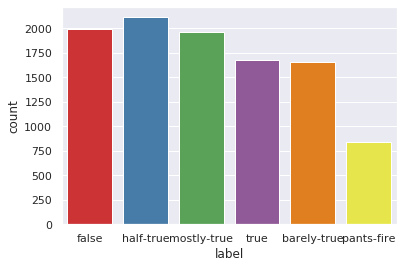

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.countplot(x='label', data=news_train, palette='Set1')

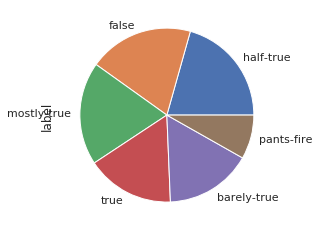

In [0]:
%matplotlib inline
news_train['label'].value_counts().plot(kind="pie")

**Visualizing label from Test dataset**

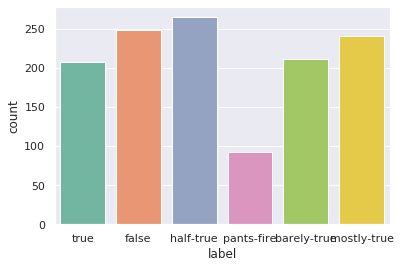

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.countplot(x='label', data=news_test, palette='Set2')

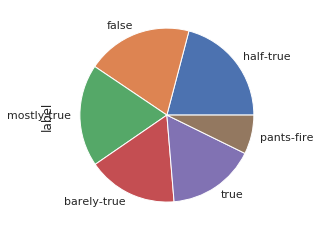

In [0]:
%matplotlib inline
news_test['label'].value_counts().plot(kind="pie")

**Visualizing label from Valid dataset**

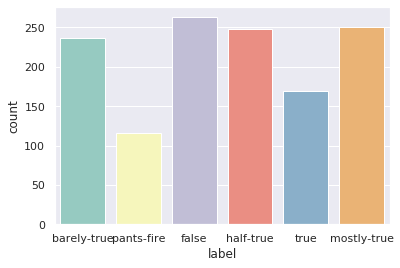

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.countplot(x='label', data=news_valid, palette='Set3')

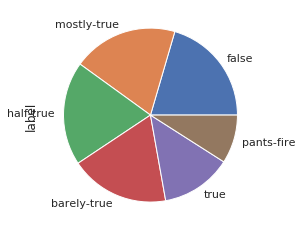

In [0]:
%matplotlib inline
news_valid['label'].value_counts().plot(kind="pie")

**Facet Grid**

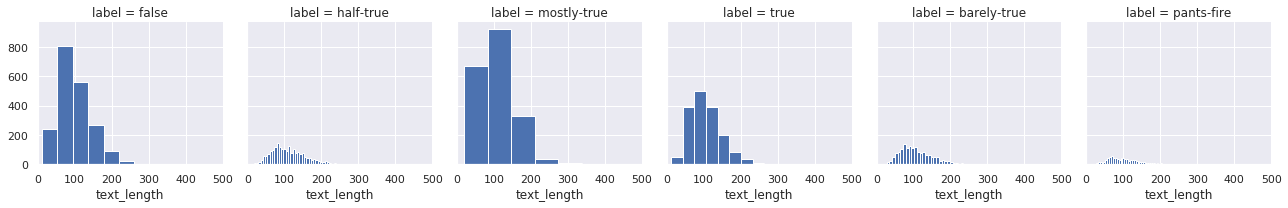

In [0]:
g = sns.FacetGrid(data=news_train, col='label')
for i, ax in enumerate(g.axes.flat): # set every-other axis for testing purposes
       ax.set_xlim(0,500)
g.map(plt.hist, 'text_length', bins=50)

Seems like overall, the distribution of text length is similar across all labels. However, the number of text length seems to be skewed a lot higher for false and mostly-true labels. 

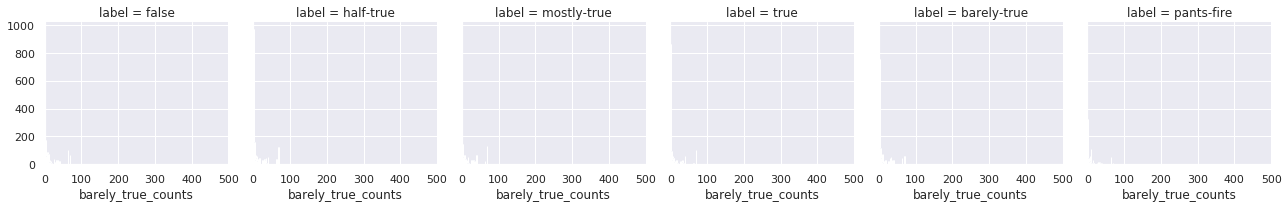

In [0]:
g = sns.FacetGrid(data=news_train, col='label')
for i, ax in enumerate(g.axes.flat):
       ax.set_xlim(0,500)
g.map(plt.hist, 'barely_true_counts', bins=50)

Visualization #

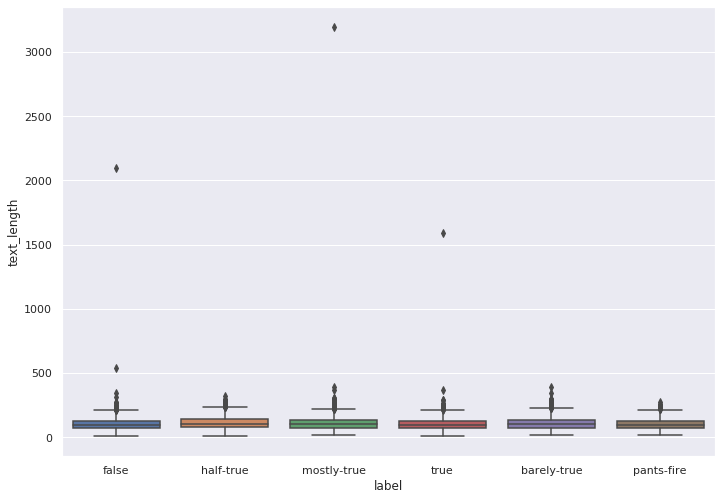

In [0]:
a4_dims = (11.7, 8.27)
f, ax = plt.subplots(figsize=a4_dims)
sns.set_style("whitegrid")
sns.boxplot(x='label', y='text_length', data=news_train)

Visualization #

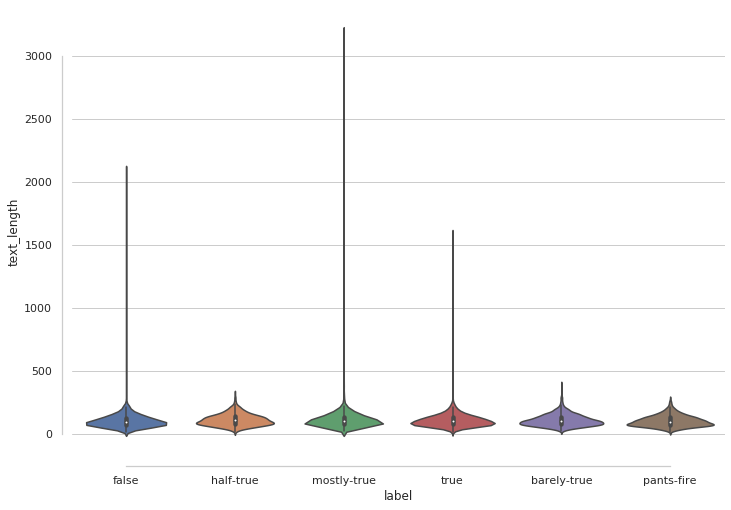

In [0]:
a4_dims = (11.7, 8.27)
f, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x='label', y='text_length', data=news_train)
sns.despine(offset=10, trim=True);

In [0]:
news_train.describe()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,text_length
count,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10240.000000
mean,11.533210,13.286482,17.133718,16.434265,6.201407,106.918750
std,18.973764,24.112936,35.846511,36.151688,16.128927,59.917722
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000,99.000000
75%,12.000000,12.000000,13.000000,11.000000,5.000000,132.250000
max,70.000000,114.000000,160.000000,163.000000,105.000000,3192.000000


#### Heat Map

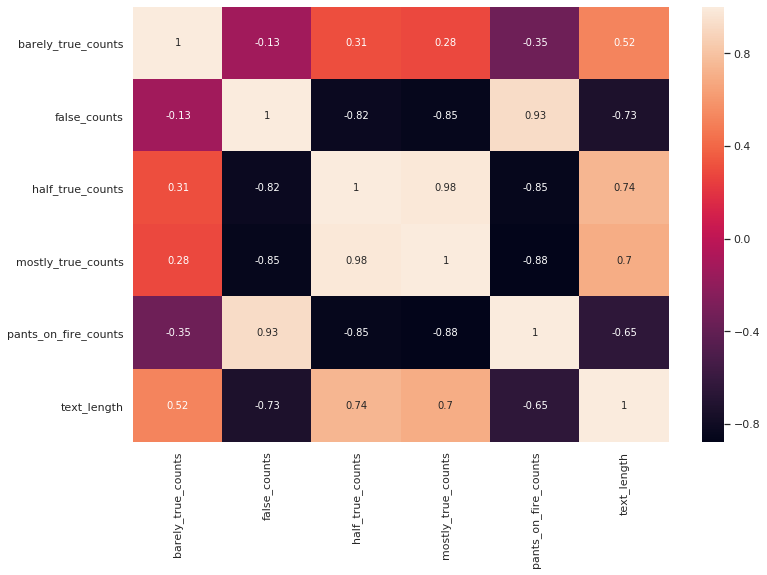

In [0]:
labels = news_train.groupby('label').mean()
labels.corr()
from matplotlib import pyplot
a4_dims = (12, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=labels.corr(), annot=True)

Looking at the map, false is strongly correlated with pants_on_fire, and mostly_true seems strongly correlated with half_true. There is also a negative correlation between false_counts and the other features.

#### Pair Plot

Pair Plot to visualize the data in Training dataset:

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


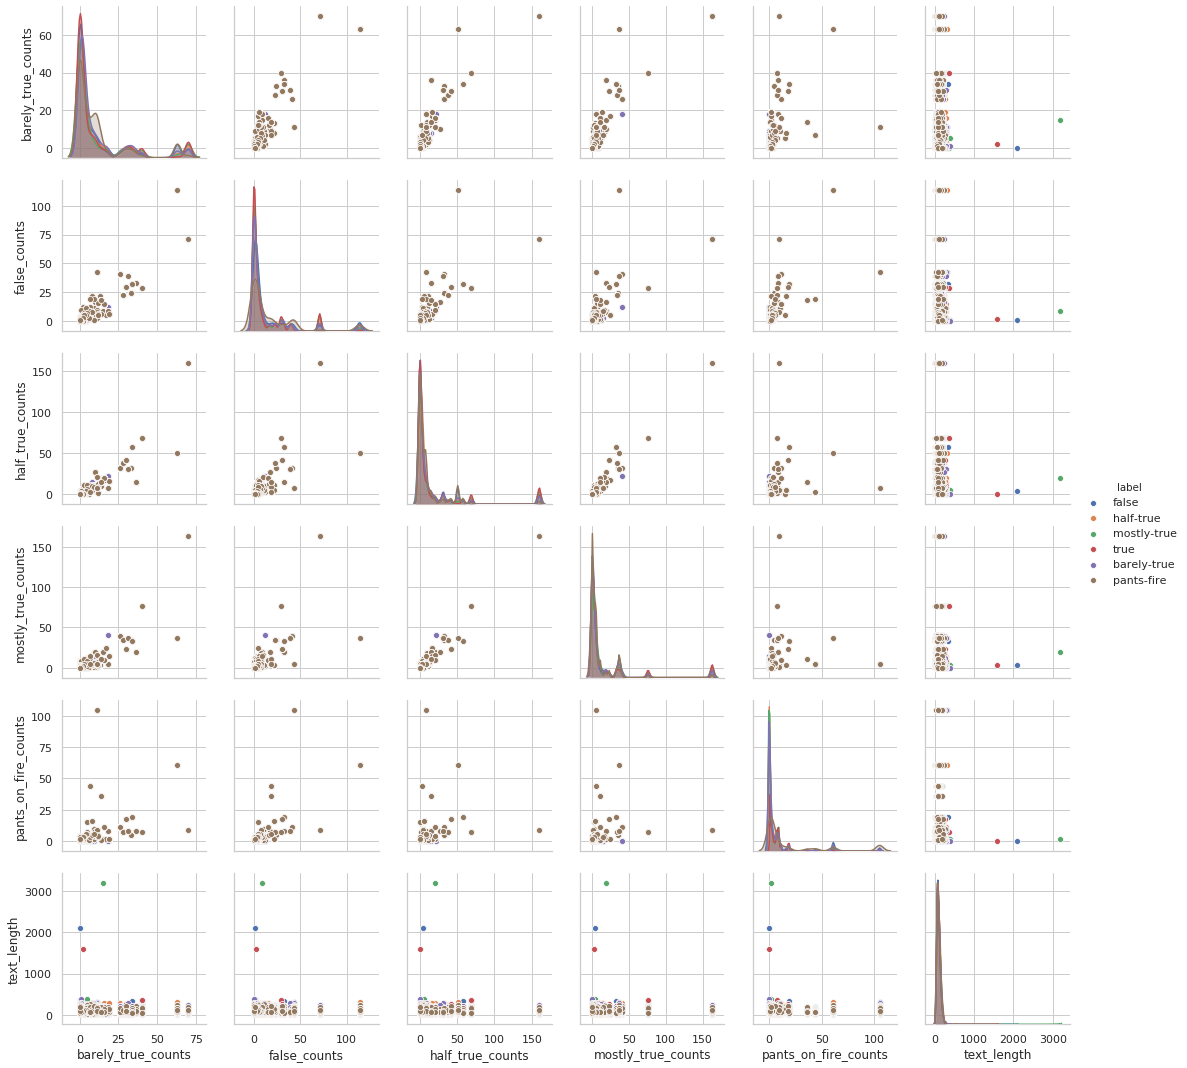

In [0]:
pair_plot = sb.pairplot(news_train, hue="label")

#### Word Cloud

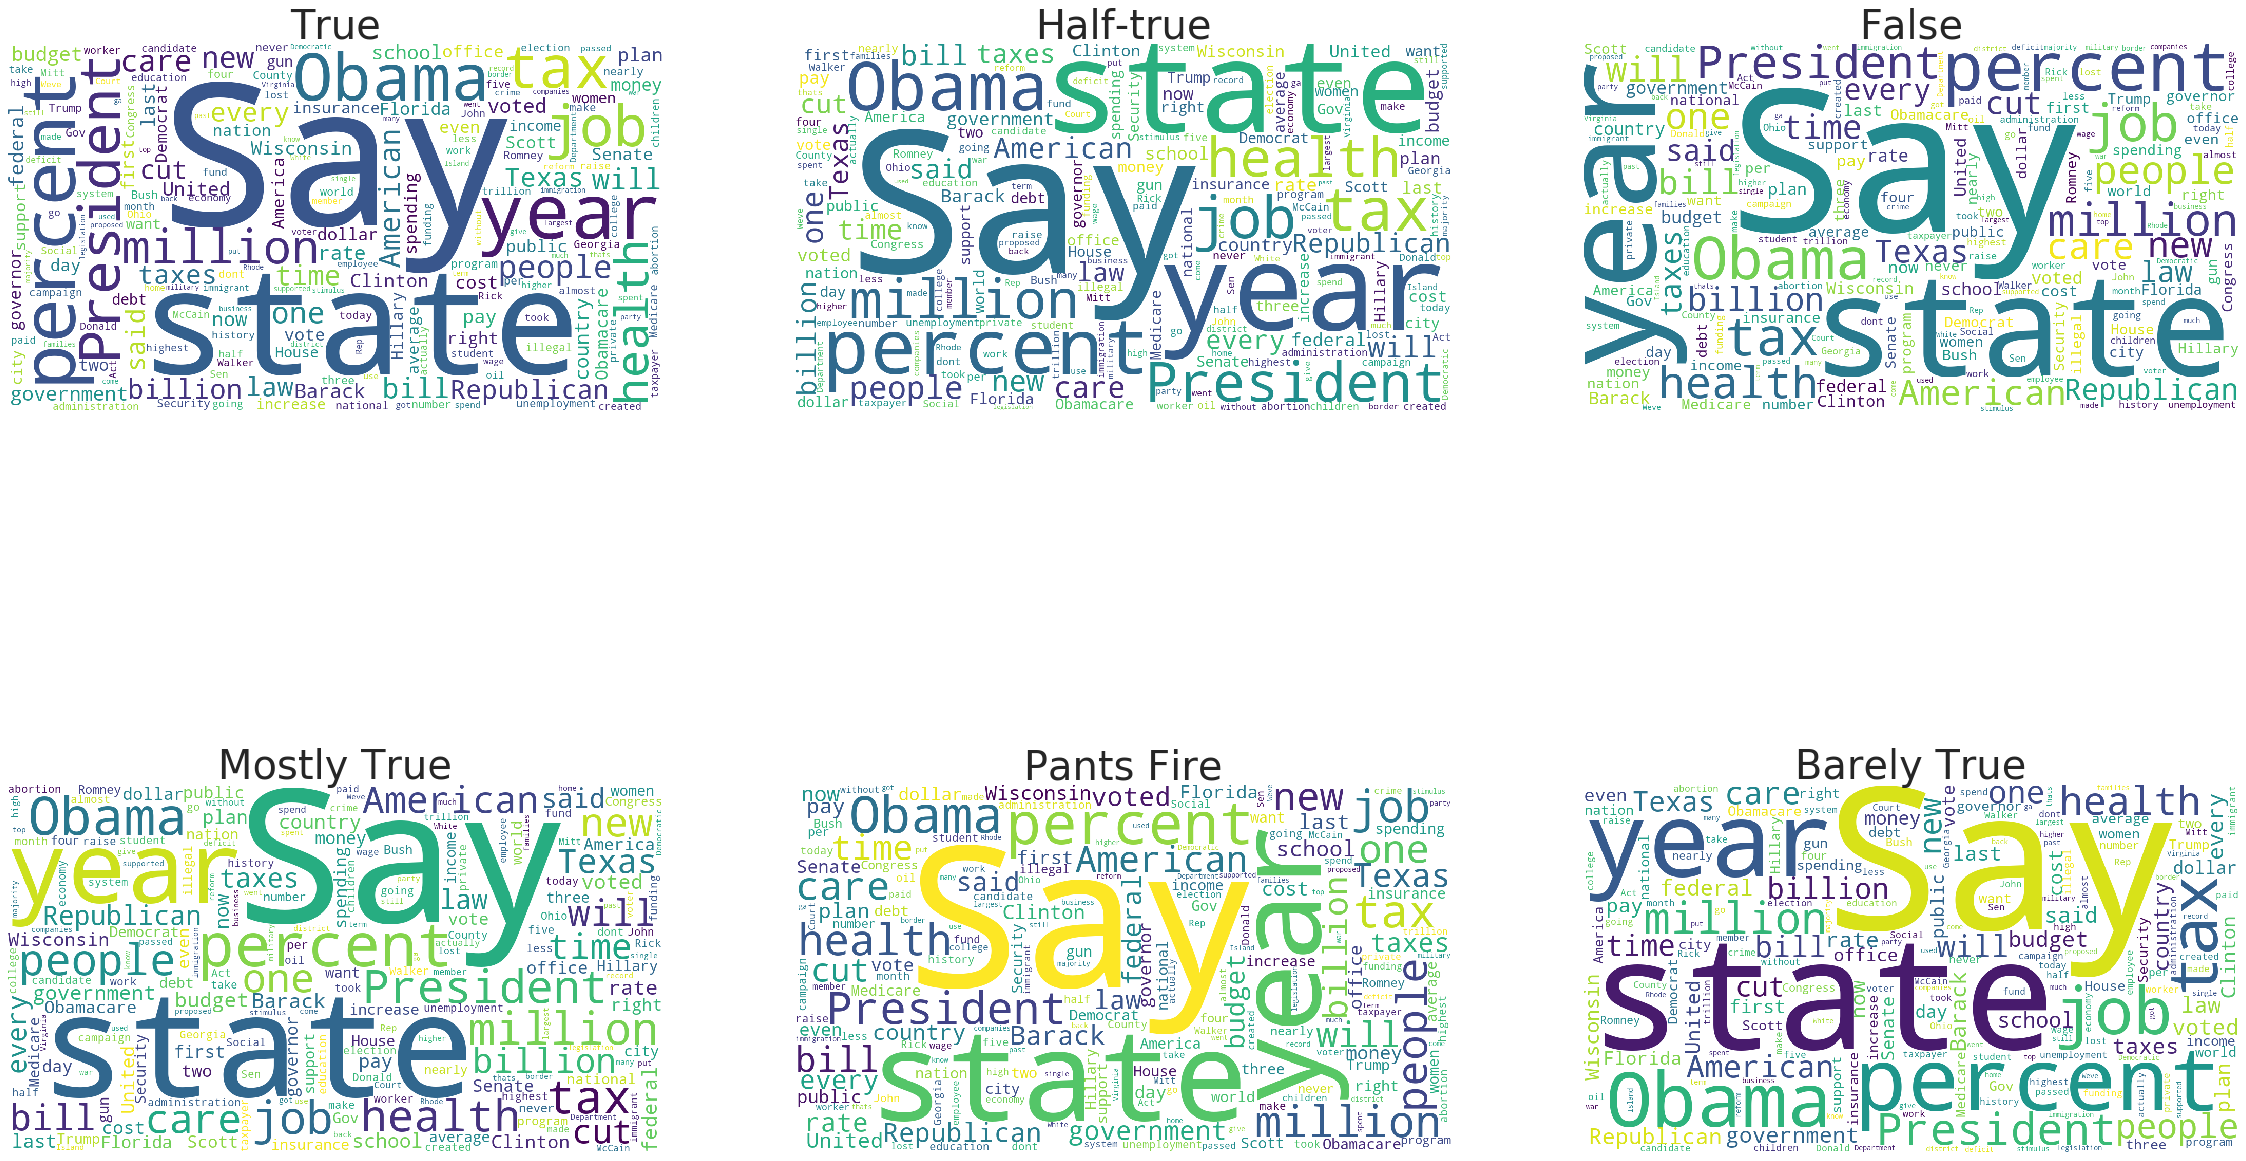

In [0]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# true
subset = news_train[news_train.label==True]
text = news_train['statement']
cloud_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1280,
                          height=720
                         ).generate(" ".join(text))


plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("True",fontsize=40)
plt.imshow(cloud_true)

# true
subset = news_train[news_train.label=='half-true']
text = news_train['statement']
cloud_half_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1280,
                          height=720
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Half-true",fontsize=40)
plt.imshow(cloud_half_true)



# false
subset = news_train[news_train.label=='false']
text = news_train['statement']
cloud_false = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1280,
                          height=720
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("False",fontsize=40)
plt.imshow(cloud_false)



# mostly-true
subset = news_train[news_train.label=='mostly-true']
text = news_train['statement']
cloud_mostly_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1280,
                          height=720
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Mostly True",fontsize=40)
plt.imshow(cloud_mostly_true)

#pants-fire
subset = news_train[news_train.label=='pants-fire']
text = news_train['statement']
cloud_pants_fire = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1280,
                          height=720
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Pants Fire",fontsize=40)
plt.imshow(cloud_pants_fire)


#barely-true
subset = news_train[news_train.label=='barely-true']
text = news_train['statement']
cloud_barely_true = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1280,
                          height=720
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Barely True",fontsize=40)
plt.imshow(cloud_barely_true)

#### Frequency Distribution

Frequency distribution of Words in Training data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


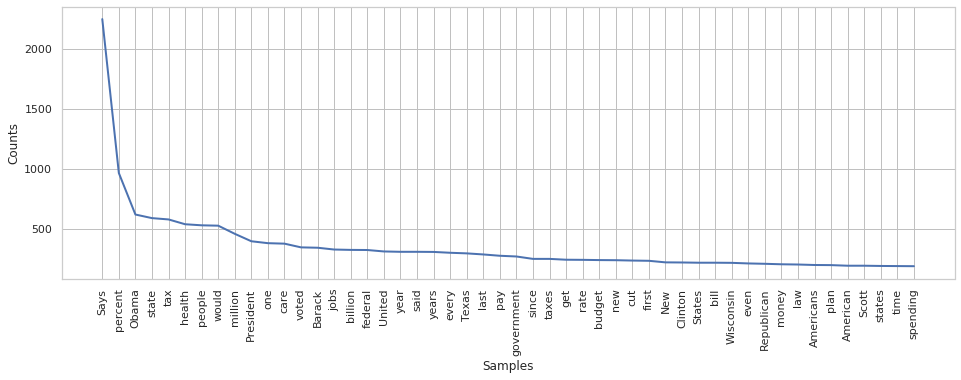

In [0]:
from collections import defaultdict
from nltk.corpus import stopwords
import pandas as pd
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')


word_list=[]
word_freq = defaultdict(int)

for text in news_train.statement:
    for word in text.split():
        if word.lower() not in stop_words and word.isalpha():
            word_list.append(word)
            word_freq[word] += 1

pd.DataFrame.from_dict(word_freq, orient='index') \
.sort_values(0, ascending=False) \
.rename(columns={0: 'abs_freq'})

freqdist = nltk.FreqDist(word_list)
plt.figure(figsize=(16,5))
freqdist.plot(50)


The following words are frequently used:
* 'Says'
* 'percent'
* 'Obama'

#### Cross Tabulation

In [0]:
#Pre-Processing for "context" which is considered the source of the news
X_train=news_train["context"]
Y_train=news_train["label"]

In [0]:
ct=pd.crosstab(X_train,Y_train,margins=True)
ct

label,barely-true,false,half-true,mostly-true,pants-fire,true,All
context,,,,,,,
CNN's 'The Situation Room',0,1,0,0,0,0,1
CNN's State of the Union with John King,0,0,0,1,0,0,1
This Week with George Stephanopoulos,0,0,1,0,0,0,1
Washington Report newsletter to constituents.,0,1,0,0,0,0,1
a Webcast,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
written testimony to a Wisconsin Senate committee,0,0,0,1,0,0,1
x,0,0,0,0,0,1,1
yard signs posted anonymously opposing a proposed office park redevelopment in Northwest Austin,0,0,0,1,0,0,1


Sorted to the highest to lowest

In [0]:
ct.sort_values('All', ascending=False)

label,barely-true,false,half-true,mostly-true,pants-fire,true,All
context,,,,,,,
All,1640,1972,2097,1945,828,1656,10138
a news release,45,44,46,41,22,43,241
an interview,30,58,47,47,13,34,229
a press release,34,41,46,45,13,44,223
a speech,24,34,54,50,8,44,214
...,...,...,...,...,...,...,...
"a rally in Cleveland, Ohio",0,1,0,0,0,0,1
"a rally in Fountain Hills, Ariz.",0,0,0,0,1,0,1
"a rally in Hershey, Pa.",0,0,0,0,1,0,1


Thus we observe the context separation according to label. We see there are total 10138 rows and 4346 cumulative subjects which can be further separated and processed on.

We observe that the most frequent news sources include:
* News release
* Interviews
* Speech
* Press release. 

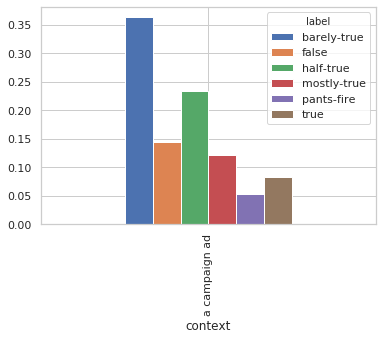

In [0]:
ct_normalized=pd.crosstab(X_train,Y_train,normalize='index', margins=True)
ct_normalized.loc[ct_normalized.index.get_level_values('context') == "a campaign ad"].plot(kind='bar')

The chart above indicates that approximately 45% of the news from "a Campaign ad" falls under the True category, 40% are false.


#### Lables in the dataset

Eploring the entire dataset based on the labels for the context field give a better understaning of the entire dataset and the percentage of fake and real news present in it.

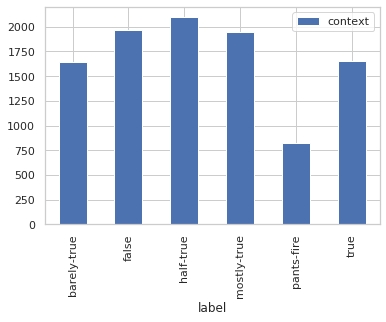

In [0]:
dfTwoCols= news_train[['label','context']]
dfTwoCols.groupby("label").count().plot(kind='bar')

#### Label Encoding to generate Verdict

For a better classification we now combine

1. False, barely-true, pants-fire as lie --> 0
2. half-true, mostly-true and True as truth --> 1

And store the values in a separate column : "verdict"

In [0]:
dfTwoCols['verdict'] = dfTwoCols['label'].map({"false": 0, "true": 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,context,verdict
0,false,a mailer,0
1,half-true,a floor speech.,1
2,mostly-true,Denver,1
3,false,a news release,0
4,half-true,an interview on CNN,1


#### Plot of the Verdict

The below graph weighs the odds of a verdict being false against a label. This gives a different, fresher  prospective of the dataset

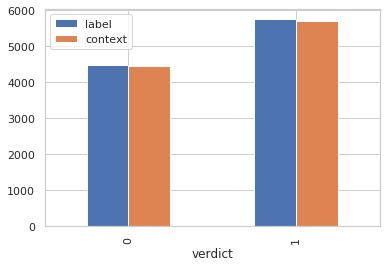

In [0]:
dfTwoCols.groupby("verdict").count().plot(kind='bar')

* Based on the verdict, we understand that the dataset is trustworthy and has higher truth values when compared to false information. 

**Cross Tabulation on Verdict**

In [0]:
ct1=pd.crosstab(dfTwoCols["context"],dfTwoCols["verdict"],margins=True)
ct1.sort_values('All', ascending=False)

verdict,0,1,All
context,,,
All,4440,5698,10138
a news release,111,130,241
an interview,101,128,229
a press release,88,135,223
a speech,66,148,214
...,...,...,...
"a rally in Cleveland, Ohio",1,0,1
"a rally in Fountain Hills, Ariz.",1,0,1
"a rally in Hershey, Pa.",1,0,1


The news source in case of blog post and chain emails have higher fake news values comepared to news release and speech made to a campaign. These points, along with the above created visualization tells us that the source of the news and its credibility  will have extremely polarised graphs.

# **4. Data Prep: Curation**

## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*
- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming 
- Spell Check 

### 1. Remove Special Characters and Punctuations
Remove all Non-Letter Characters using Regular Expression

In [0]:
import re

example = news_train["statement"][0]
news = re.sub("[^a-zA-Z]", " ", example)
print("Before: ", example)
print("\nAfter: ", news)

Before:  Says the Annies List political group supports third-trimester abortions on demand.

After:  Says the Annies List political group supports third trimester abortions on demand 


### 2. Lower Case the news

In [0]:
print("Before: ", news)
news = news.lower()
print("\nAfter: ", news)

Before:  Says the Annies List political group supports third trimester abortions on demand 

After:  says the annies list political group supports third trimester abortions on demand 


### 3. Tokenization 
> Tokenization is the process of splitting a sentence or paragraph into the most basic units.

In [0]:
# Import Natural Language Toolkit
import nltk
import nltk
nltk.download('punkt')
# Instead of using just split() method, used word_tokenize in nltk library.
print("Before: ", news)
news_words = nltk.word_tokenize(news)
print("\nAfter:   ", news_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Before:  says the annies list political group supports third trimester abortions on demand 

After:    ['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand']


### 4. Remove Stop words 
> "Stop words" is the frequently occurring words that do not carry much meaning such as "a", "and" , "is", "the". In order to use the data as input for machine learning algorithms, we need to get rid of them. Fortunately, there is a function called stopwords which is already built in NLTK library

In [0]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
print("List of Stop words: \n" , stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
List of Stop words: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'h

In [0]:
# Exclude the stop words from the original tokens.
words = [w for w in news_words if not w in set(stopwords.words("english"))]
print("\n\nBefore: \n", news_words)
print("\n\nAfter: \n", words)



Before: 
 ['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand']


After: 
 ['says', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'demand']


Observation : The words "the" and "on" is removed

### 5. Lemmatization
> Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse. ex) studying -> study, studied -> study. Lemmatization also discerns the meaning of the word by understanding the context of a passage. Example: If a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet"

In [0]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wordnet_lem = WordNetLemmatizer()
lem_words = [ wordnet_lem.lemmatize(w) for w in words ]
print("Before: \n", words )
print("\nAfter: \n", lem_words )

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Before: 
 ['says', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'demand']

After: 
 ['say', 'annies', 'list', 'political', 'group', 'support', 'third', 'trimester', 'abortion', 'demand']


### 6. Stemming

> Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this an approach that offers some limitations. ex) studying -> study, studied -> studi 

In [0]:
snow = nltk.stem.SnowballStemmer('english')

stems = [snow.stem(w) for w in lem_words ]
print("Before: \n", lem_words )
print("\nAfter: \n",stems )

Before: 
 ['say', 'annies', 'list', 'political', 'group', 'support', 'third', 'trimester', 'abortion', 'demand']

After: 
 ['say', 'anni', 'list', 'polit', 'group', 'support', 'third', 'trimest', 'abort', 'demand']


Observation : The word "says", it is converted to "say" and "political", "supports" and "abortions" are converted to "polit", "support" and "abort"

# **5. Distillation**

## Natural Language Processing

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
stemmer = SnowballStemmer('english')
original_words = ['interviews', 'debates', 'conferences', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,interviews,interview
1,debates,debat
2,conferences,confer
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


Functions for Lemmetizing and Stemming

In [0]:
#Funtions for lemetizing and stemming
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    try:
        for token in gensim.utils.simple_preprocess(text):
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                result.append(lemmatize_stemming(token))
    except:
        pass
        
    return result

In [0]:
# Testing with a ID
doc_sample = news_train[news_train['id'] == '2635.json']["context"][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['a', 'mailer']


 tokenized and lemmatized document: 
['mailer']


In [0]:
# on successful execution on the sample test, processing for all documents
processed_docs = news_train['context'].map(preprocess)
processed_docs[:10]

0                           [mailer]
1                    [floor, speech]
2                           [denver]
3                     [news, releas]
4                        [interview]
5             [onlin, opinion, piec]
6                    [press, releas]
7    [democrat, debat, philadelphia]
8                           [websit]
9                     [onlin, video]
Name: context, dtype: object

In [0]:
# Create the dictionary
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 mailer
1 floor
2 speech
3 denver
4 news
5 releas
6 interview
7 onlin
8 opinion
9 piec
10 press


In [0]:
# Remove all the words that appear too many or too few times and restrict to 100000 words
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dictionary)

Dictionary(201 unique tokens: ['mailer', 'floor', 'speech', 'denver', 'news']...)


In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10][0]

(2, 1)

In [0]:
# corpus and frequency count for each document
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))
print(len(bow_corpus))

Word 4 ("news") appears 1 time.
Word 5 ("releas") appears 1 time.
10240


## Naive Bayes Classifier

In [0]:
# Create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=preprocess)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [0]:
class_train=np.array(dfTwoCols["verdict"])
print(class_train)
class_train=class_train.reshape(-1,1)
print(class_train)

pipeline.fit(news_train['statement'], class_train )

[0 1 1 ... 1 0 0]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function preprocess at 0x7efebdcaa0d0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Create a new Test DataFrame which holds
* Label
* Statement
* Context

In [0]:
dfs_test = news_test
dfs_test.isnull().sum()

dfs_test = news_test[["label", "statement", "context"]]

In [0]:
dfs_test.isnull().sum()

label         0
statement     0
context      17
dtype: int64

In [0]:
dfs_test['context'] = dfs_test['context'].fillna('None')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Test change and assign classification on dataset
# dfs_test = pd.read_excel("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Anand/test_data.xlsx")
msg_test=dfs_test['context']
dfTwoCols_test= dfs_test[['label','context']]
dfTwoCols_test['verdict'] = dfTwoCols_test['label'].map({"false": 0, "true": 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols_test

,label,context,verdict
0,true,Radio interview,1
1,false,a news conference,0
2,false,comments on ABC's This Week.,0
3,half-true,a radio show,1
4,pants-fire,a web video,0
...,...,...,...
1262,half-true,a news conference,1
1263,barely-true,"on ABC's ""This Week""",0
1264,barely-true,a commentary in The Providence Journal,0
1265,barely-true,a news conference,0


In [0]:
class_test=np.array(dfTwoCols_test["verdict"])
print(class_test)
class_test=class_test.reshape(-1,1)
print(class_test)
predictions = pipeline.predict(msg_test)

[1 0 0 ... 0 0 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


**Heat Map Confusion Matrix**

A heat map can be plotted on the basis of the outcome form the Naïve Bayesian classifier which is found below

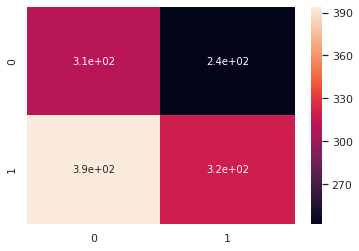

In [0]:
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)
# references: https://www.kaggle.com/astandrik/simple-spam-filter-using-naive-bayes

## Sentiment Analysis Using Data Enrichment
Ref: https://blog.lftechnology.com/predicting-sentiment-on-news-data-45c5c22ec2e3

Sentiment analysis has been performed by inducing a new dataset into the model. This dataset has a common field called "source" which can be infered as "context" in our exising dataset This is the enrichment we have acheiived for this step

In [0]:
# Data enrichment
data_source = pd.read_excel("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Anand/uci-news-aggregator.xlsx")


In [0]:
data_source.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


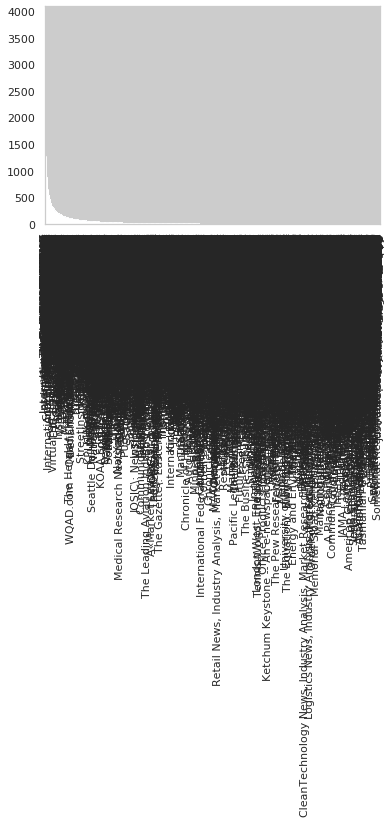

In [0]:
# The publisher is the news source in this dataset 
data_source['PUBLISHER'].value_counts().plot(kind="bar")
plt.show()

### Sentiment analysis

I have used the “Vader lexicon” from the ntlk library for the analysis. This lexicon library returns a 
sentiment score in the range of -1 to +1, and as they imply it ranges from negative to positive. This library gives a cumulative score on each sentence based on the sentiment score of each of the Vader listed words comprising the sentence.  


 The ntlk_sentiment function makes use of the nltk.sentiment.sentiment_analyzer module to access the sentiment score of each word comprising the sentence. Thus, for each of the sentences we have a list of values showing negative, neutral and positive scores. The scores are reclassified in a way to get a better understanding of the dataset. 

In [0]:
# Using vader lexicon to determine sentiment
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [0]:
for row in news_train["context"]:
    try:
        nltk_context = nltk_sentiment(row) 
    except:
        pass
    
print (nltk_context)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [0]:
nltk_results = [nltk_sentiment(row) for row in news_train["statement"]]
results_df = pd.DataFrame(nltk_results)
text_df = pd.DataFrame(news_train, columns = ['statement'])
nltk_df = text_df.join(results_df)
verdict_df=pd.DataFrame(dfTwoCols, columns=['verdict'])
nltk_df=nltk_df.join(verdict_df)

In [0]:
nltk_df.head()

,statement,neg,neu,pos,compound,verdict
0,Says the Annies List political group supports ...,0.115,0.692,0.192,0.2500,0
1,When did the decline of coal start? It started...,0.000,0.902,0.098,0.3612,1
2,"Hillary Clinton agrees with John McCain ""by vo...",0.107,0.687,0.206,0.3182,1
3,Health care reform legislation is likely to ma...,0.000,0.606,0.394,0.7579,0
4,The economic turnaround started at the end of ...,0.000,1.000,0.000,0.0000,1


In [0]:
# Reclassify results to get better understanding
nltk_df.loc[nltk_df['compound'] > 0.2, 'compound'] = 1
nltk_df.loc[nltk_df['compound'] < -0.2, 'compound'] = -1
nltk_df.loc[(nltk_df['compound'] > -0.2) & (nltk_df['compound'] < 0.2), 'compound'] = 0
nltk_df

,statement,neg,neu,pos,compound,verdict
0,Says the Annies List political group supports ...,0.115,0.692,0.192,1.0,0
1,When did the decline of coal start? It started...,0.000,0.902,0.098,1.0,1
2,"Hillary Clinton agrees with John McCain ""by vo...",0.107,0.687,0.206,1.0,1
3,Health care reform legislation is likely to ma...,0.000,0.606,0.394,1.0,0
4,The economic turnaround started at the end of ...,0.000,1.000,0.000,0.0,1
...,...,...,...,...,...,...
10235,There are a larger number of shark attacks in ...,0.319,0.619,0.062,-1.0,1
10236,Democrats have now become the party of the [At...,0.000,0.828,0.172,1.0,1
10237,Says an alternative to Social Security that op...,0.000,0.839,0.161,1.0,1
10238,On lifting the U.S. Cuban embargo and allowing...,0.000,1.000,0.000,0.0,0


In [0]:
nltk_df_f=nltk_df[["statement","compound","verdict"]]

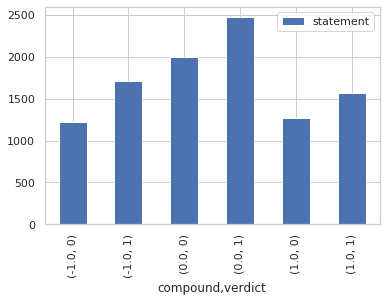

In [0]:
nltk_df_f.groupby(["compound","verdict"]).count().plot(kind='bar')

* The effect of negative, neutral and positive context on true and false news can be understood

## Sensationalism quantification
> Based on Punctuation, Length, Similarity to Source dictionary

Based on the dictionary we have generated, we try and quntify the credibility of the news source based on its punctuations, lenth, similarity to the source in the dataset

In [0]:
dfs_train_sensa= news_train
dfs_train_sensa['verdict']=dfTwoCols['verdict']
dfs_train_sensa

,id,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,text_length,verdict
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,82,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105,1
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,78,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",90,1
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,78,1
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,176,1
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,62,0


Profanity List

In [0]:
PROFANITY=['anus', 'arse', 'arsehole', 'ass', 'ass-hat', 'ass-jabber', 'ass-pirate', 'assbag', 'assbandit', 'assbanger', 'assbite', 'assclown', 'asscock', 'asscracker', 'asses', 'assface', 'assfuck', 'assfucker', 'assgoblin', 'asshat', 'asshead', 'asshole', 'asshopper', 'assjacker', 'asslick', 'asslicker', 'assmonkey', 'assmunch', 'assmuncher', 'assnigger', 'asspirate', 'assshit', 'assshole', 'asssucker', 'asswad', 'asswipe', 'balls', 'bampot', 'bastard', 'beaner', 'bint', 'bitch', 'bitchass', 'bitches', 'bitchtits', 'bitchy', 'bloody', 'blowjob', 'blowjob', 'bollocks', 'bollox', 'boner', 'brotherfucker', 'bugger', 'bullshit', 'bumblefuck', 'butt plug', 'butt-pirate', 'buttfucka', 'buttfucker', 'camel toe', 'carpetmuncher', 'chinc', 'chink', 'choad', 'chode', 'clit', 'clitface', 'clitfuck', 'clusterfuck', 'cock', 'cockass', 'cockbite', 'cockburger', 'cockface', 'cockfucker', 'cockhead', 'cockjockey', 'cockknoker', 'cockmaster', 'cockmongler', 'cockmongruel', 'cockmonkey', 'cockmuncher', 'cocknose', 'cocknugget', 'cockshit', 'cocksmith', 'cocksmoke', 'cocksmoker', 'cocksniffer', 'cocksucker', 'cockwaffle', 'coochie', 'coochy', 'coon', 'cooter', 'cracker', 'cum', 'cumbubble', 'cumdumpster', 'cumguzzler', 'cumjockey', 'cumslut', 'cumtart', 'cunnie', 'cunnilingus', 'cunt', 'cuntass', 'cuntface', 'cunthole', 'cuntlicker', 'cuntrag', 'cuntslut', 'dago', 'damn', 'deggo', 'dick', 'dickbag', 'dickbeaters', 'dickface', 'dickfuck', 'dickfucker', 'dickhead', 'dickhole', 'dickjuice', 'dickmilk', 'dickmonger', 'dicks', 'dickslap', 'dicksucker', 'dicksucking', 'dickwad', 'dickweasel', 'dickweed', 'dickwod', 'dike', 'dildo', 'dipshit', 'doochbag', 'dookie', 'douche', 'douche-fag', 'douchebag', 'douchewaffle', 'dumass', 'dumb ass', 'dumbass', 'dumbfuck', 'dumbshit', 'dumshit', 'dyke', 'fag', 'fagbag', 'fagfucker', 'faggit', 'faggot', 'faggotcock', 'fagtard', 'fatass', 'fellatio', 'feltch', 'flamer', 'fool', 'frickin', 'friggin', 'f*ck', 'fuck', 'fuckass', 'fuckbag', 'fuckboy', 'fuckbrain', 'fuckbutt', 'fucked', 'fucker', 'fuckersucker', 'fuckface', 'fuckhead', 'fuckhole', 'fuckin', 'fucking', 'fucknut', 'fucknutt', 'fuckoff', 'fucks', 'fuckstick', 'fucktard', 'fucktart', 'fuckup', 'fuckwad', 'fuckwit', 'fuckwitt', 'fudgepacker', 'gay', 'gayass', 'gaybob', 'gaydo', 'gayfuck', 'gayfuckist', 'gaylord', 'gaytard', 'gaywad', 'goddamn', 'goddamnit', 'gooch', 'gook', 'gringo', 'guido', 'handjob', 'hard on', 'heeb', 'helminth', 'hell', 'ho', 'hoe', 'hoebag', 'homo', 'homodumbshit', 'honkey', 'humping', 'idiot', 'imbecile', 'jackass', 'jap', 'jerk off', 'jerk wad', 'jigaboo', 'jizz', 'jungle bunny', 'junglebunny', 'kike', 'kooch', 'kootch', 'kraut', 'kunt', 'kyke', 'lameass', 'lesbian', 'lesbo', 'lezzie', 'mcfagget', 'mick', 'midget', 'minge', 'moron', 'mothafucka', 'mothafuckin', 'motherfucker', 'motherfucking', 'muff', 'muffdiver', 'munging', 'negro', 'nigaboo', 'nigga', 'nigger', 'niggers', 'niglet', 'nutter', 'nut sack', 'nutsack', 'paki', 'panooch', 'pecker', 'peckerhead', 'penis', 'penisbanger', 'penisfucker', 'penispuffer', 'piss', 'pissed', 'pissed off', 'pissflaps', 'polesmoker', 'pollock', 'poon', 'poonani', 'poonany', 'poontang', 'porch monkey', 'porchmonkey', 'prick', 'punanny', 'punta', 'pussies', 'pussy', 'pussylicking', 'puto', 'queef', 'queer', 'queerbait', 'queerhole', 'renob', 'retard', 'rimjob', 'ruski', 'sand nigger', 'sandnigger', 'schlong', 'schmuck', 'scrote', 'scullion', 'shag', 'shit', 'shitass', 'shitbag', 'shitbagger', 'shitbrains', 'shitbreath', 'shitcanned', 'shitcunt', 'shitdick', 'shitface', 'shitfaced', 'shithead', 'shithole', 'shithouse', 'shitspitter', 'shitstain', 'shitter', 'shittiest', 'shitting', 'shitty', 'shiz', 'shiznit', 'skank', 'skeet', 'skullfuck', 'slag', 'slapper', 'slut', 'slutbag', 'slubberdegullion', 'smeg', 'snatch', 'sodding', 'sonofabitch', 'spastic', 'spic', 'spick', 'splooge', 'spook', 'suckass', 'tard', 'testicle', 'thundercunt', 'tit', 'titfuck', 'tits', 'tittyfuck', 'trollop', 'twat', 'twatlips', 'twats', 'twatwaffle', 'unclefucker', 'va-j-j', 'vag', 'vagina', 'vajayjay', 'vjayjay', 'wank', 'wanker', 'wankjob', 'wetback', 'whore', 'whorebag', 'whoreface', 'wop']

Sensational Phrases

In [0]:
sensationalist_phrases = [

	# Ref: Analyst's Desktop Binder of Homeland Security https://www.scribd.com/doc/82701103/Analyst-Desktop-Binder-REDACTED
	
	'Assassination',
	'Attack',
	'Domestic security',
	'Law enforcement',
	'Disaster',
	'National preparedness',
	'Response',
	'Recovery',
	'Emergency response',
	'First responder',
	'Militia',
	'Shooting',
	'Evacuation',
	'Hostage',
	'Explosion',
	'Organized crime',
	'Gangs',
	'National security',
	'State of emergency',
	'Security breach',
	'Threat',
	'Standoff',
	'Lockdown',
	'Bomb',
	'Riot',
	'Emergency Landing',
	'Incident',
	'Suspicious',
	'Nuclear threat',
	'Hazardous',
	'Infection',
	'Outbreak',
	'Contamination',
	'Terror',
	'Epidemic',
	'Critical Infrastructure',
	'National infrastructure',
	'Transportation security',
	'Grid',
	'Outage',
	'Disruption',
	'Violence',
	'Drug cartel',
	'Narcotics',
	'Shootout',
	'Trafficking',
	'Kidnap',
	'Illegal',
	'Smuggling', 
	'Al Qaeda',
	'Terror attack',
	'Weapon',
	'Improvised explosive device',
	'Suicide bomber',
	'Suicide attack',
	'Hurricane',
	'Tornado',
	'Tsunami',
	'Earthquake',
	'Tremor',
	'Flood',
	'Storm',
	'Extreme weather',
	'Forest fire',
	'Ice',
	'Stranded',
	'Wildfire',
	'Avalanche',
	'Blizzard',
	'Lightening',
	'Emergency Broadcast System',
	'Cyber Security',
	'DDOS',
	'Denial of service',
	'Malware',
	'Phishing',
	'Cyber attack',
	'Cyber terror'
]

Function to detect sensational phrases

In [0]:
def sensphrasedetect(str):
    sum =0
    for x in sensationalist_phrases:
        if x.lower() in str.lower():
            sum+=1
    return sum

Extract punctuation, capital letters, digits and length

In [0]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])

pcCount=[]
capCount=[]
digCount=[]
lenCount=[]
profanCount=[]
sensphrCount=[]
for x in dfs_train_sensa['context']:
    try:
        pcCount.append(sum(1 for c in x if c=="!" or c=="?"))
        capCount.append(sum(1 for c in x if c.isupper()))
        digCount.append(sum(1 for c in x if c.isdigit()))
        lenCount.append(len(x))
        sensphrCount.append(sensphrasedetect(x))
    except:
        pass
for x in processed_docs:
    try:
        profanCount.append(float(len([w for w in x if w.lower() in PROFANITY]))/len(x))
    except:
        profanCount.append(0)
dfs_train_sensa['puncCount']=pd.Series(pcCount)
dfs_train_sensa['capCount']=pd.Series(capCount)
dfs_train_sensa['digCount']=pd.Series(digCount)
dfs_train_sensa['lenCount']=pd.Series(lenCount)
dfs_train_sensa['profanCount']=pd.Series(profanCount)
dfs_train_sensa['sensPhrCount']=pd.Series(sensphrCount)
dfs_train_sensa.head()

,id,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,text_length,verdict,puncCount,capCount,digCount,lenCount,profanCount,sensPhrCount
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,82,0,0.0,0.0,0.0,8.0,0.0,0.0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141,1,0.0,0.0,0.0,15.0,0.0,0.0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105,1,0.0,1.0,0.0,6.0,0.0,0.0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,78,0,0.0,0.0,0.0,14.0,0.0,0.0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54,1,0.0,3.0,0.0,19.0,0.0,0.0


Print the values

In [0]:
dfs_train_sensa_true=dfs_train_sensa[dfs_train_sensa['verdict']==1]
dfs_train_sensa_false=dfs_train_sensa[dfs_train_sensa['verdict']==0]
print("true: "+str(dfs_train_sensa_true.shape[0]))
print("avg punc: "+str(dfs_train_sensa_true["puncCount"].mean()))
print("avg cap: "+str(dfs_train_sensa_true["capCount"].mean()))
print("avg dig: "+str(dfs_train_sensa_true["digCount"].mean()))
print("avg len: "+str(dfs_train_sensa_true["lenCount"].mean()))
print("avg profan: "+str(dfs_train_sensa_true["profanCount"].mean()))
print("avg sensation phr: "+str(dfs_train_sensa_true["sensPhrCount"].mean()))
print("false: "+str(dfs_train_sensa_false.shape[0]))
print("avg punc: "+str(dfs_train_sensa_false["puncCount"].mean()))
print("avg cap: "+str(dfs_train_sensa_false["capCount"].mean()))
print("avg dig: "+str(dfs_train_sensa_false["digCount"].mean()))
print("avg len: "+str(dfs_train_sensa_false["lenCount"].mean()))
print("avg profan: "+str(dfs_train_sensa_false["profanCount"].mean()))
print("avg sensation phr: "+str(dfs_train_sensa_false["sensPhrCount"].mean()))

true: 5752
avg punc: 0.0007023705004389816
avg cap: 1.4971027216856891
avg dig: 0.04846356453028973
avg len: 24.288498683055312
avg profan: 0.00010306973971786212
avg sensation phr: 0.008604038630377524
false: 4488
avg punc: 0.0006752194463200541
avg cap: 1.5199189736664416
avg dig: 0.0504163853252307
avg len: 24.30542426288544
avg profan: 6.366182836771072e-05
avg sensation phr: 0.010353364843574162


* Observation : Thus we can conclusively confirm that on an average true contexts have lower punctuations like (!,?), lower profanity, lower sensational phrases and lower number of capital letters.

# **6. Unsupervised Exploration : Find relevant Clusters in Your Data**
## Not applicable for this factor and dataset columns

# **7. Supervised Training Preparation:**

In [0]:
dfs_test

,label,statement,context
0,true,Building a wall on the U.S.-Mexico border will...,Radio interview
1,false,Wisconsin is on pace to double the number of l...,a news conference
2,false,Says John McCain has done nothing to help the ...,comments on ABC's This Week.
3,half-true,Suzanne Bonamici supports a plan that will cut...,a radio show
4,pants-fire,When asked by a reporter whether hes at the ce...,a web video
...,...,...,...
1262,half-true,Says his budget provides the highest state fun...,a news conference
1263,barely-true,Ive been here almost every day.,"on ABC's ""This Week"""
1264,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...",a commentary in The Providence Journal
1265,barely-true,Says an EPA permit languished under Strickland...,a news conference


In [0]:
dfs_test_sensa=dfs_test
dfs_test_sensa['verdict']=dfTwoCols_test['verdict']


In [0]:
dfs_test_sensa.head()

,label,statement,context,verdict
0,true,Building a wall on the U.S.-Mexico border will...,Radio interview,1
1,false,Wisconsin is on pace to double the number of l...,a news conference,0
2,false,Says John McCain has done nothing to help the ...,comments on ABC's This Week.,0
3,half-true,Suzanne Bonamici supports a plan that will cut...,a radio show,1
4,pants-fire,When asked by a reporter whether hes at the ce...,a web video,0


### Multinomial Naive Bayes

In [0]:
cv = CountVectorizer()

In [0]:
dfs_test_sensa.dropna(inplace= True)
dfs_train_sensa.dropna(inplace= True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
        ('NBCV',cv),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(dfs_train_sensa['context'],dfs_train_sensa['verdict'])
predicted_nb = nb_pipeline.predict(dfs_test_sensa['context'])
np.mean(predicted_nb == dfs_test_sensa['verdict'])

0.5627466456195738

In [0]:
test_pred_verdict = dfs_test_sensa['verdict']

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score
print(classification_report(test_pred_verdict,predicted_nb))
cnfmtx=confusion_matrix(test_pred_verdict,predicted_nb)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(test_pred_verdict, predicted_nb))
print("Mean absolute error: %.2f" %mean_absolute_error(test_pred_verdict, predicted_nb))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(test_pred_verdict, predicted_nb)))
print('Accuracy :', accuracy_score(test_pred_verdict,predicted_nb))

              precision    recall  f1-score   support

           0       0.50      0.27      0.35       553
           1       0.58      0.79      0.67       714

    accuracy                           0.56      1267
   macro avg       0.54      0.53      0.51      1267
weighted avg       0.55      0.56      0.53      1267

Confusion matrix:
 [[147 406]
 [148 566]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 
Accuracy : 0.5627466456195738


Verify by passing a reliable news source. 1 -> True Soure, 0 -> Fake Source

### Decison Tree

In [0]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

dctree_pipeline = Pipeline([
        ('DCTree',cv),
        ('DcTree_clf',DecisionTreeClassifier())])

dctree_pipeline.fit(dfs_train_sensa['context'],dfs_train_sensa['verdict'])
predicted_dTree = dctree_pipeline.predict(dfs_test_sensa['context'])
np.mean(predicted_dTree == dfs_test_sensa['verdict'])

0.5327545382794001

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score
print(classification_report(test_pred_verdict,predicted_dTree))
cnfmtx=confusion_matrix(test_pred_verdict,predicted_dTree)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(test_pred_verdict, predicted_dTree))
print("Mean absolute error: %.2f" %mean_absolute_error(test_pred_verdict, predicted_dTree))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(test_pred_verdict, predicted_dTree)))
print('Accuracy :', accuracy_score(test_pred_verdict,predicted_dTree))

              precision    recall  f1-score   support

           0       0.45      0.29      0.35       553
           1       0.57      0.72      0.63       714

    accuracy                           0.53      1267
   macro avg       0.51      0.51      0.49      1267
weighted avg       0.51      0.53      0.51      1267

Confusion matrix:
 [[161 392]
 [200 514]]
Mean squared error: 0.47
Mean absolute error: 0.47
Root Mean Squared Error: 0.68 
Accuracy : 0.5327545382794001


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d


ranForest_pipeline = Pipeline([
        ('RanForest',cv),
        ('RanForest_clf',RandomForestClassifier())])

ranForest_pipeline.fit(dfs_train_sensa['context'],dfs_train_sensa['verdict'])
predicted_ranForest = ranForest_pipeline.predict(dfs_test_sensa['context'])
np.mean(predicted_ranForest == dfs_test_sensa['verdict'])

0.5430149960536701

In [0]:
print(classification_report(test_pred_verdict,predicted_ranForest))
cnfmtx=confusion_matrix(test_pred_verdict,predicted_ranForest)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(test_pred_verdict, predicted_ranForest))
print("Mean absolute error: %.2f" %mean_absolute_error(test_pred_verdict, predicted_ranForest))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(test_pred_verdict, predicted_ranForest)))
print('Accuracy :', accuracy_score(test_pred_verdict,predicted_ranForest))

              precision    recall  f1-score   support

           0       0.46      0.25      0.32       553
           1       0.57      0.77      0.66       714

    accuracy                           0.54      1267
   macro avg       0.51      0.51      0.49      1267
weighted avg       0.52      0.54      0.51      1267

Confusion matrix:
 [[138 415]
 [164 550]]
Mean squared error: 0.46
Mean absolute error: 0.46
Root Mean Squared Error: 0.68 
Accuracy : 0.5430149960536701


### Simple Vector Machine

In [0]:
from sklearn.svm import SVC
warnings.filterwarnings("ignore",category=FutureWarning)

svc_pipeline = Pipeline([
        ('svc_pip',cv),
        ('svc_clf',SVC())])

svc_pipeline.fit(dfs_train_sensa['context'],dfs_train_sensa['verdict'])
predicted_svc = svc_pipeline.predict(dfs_test_sensa['context'])
np.mean(predicted_svc == dfs_test_sensa['verdict'])

0.56353591160221

In [0]:
print(classification_report(test_pred_verdict,predicted_svc))
cnfmtx=confusion_matrix(test_pred_verdict,predicted_svc)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(test_pred_verdict, predicted_svc))
print("Mean absolute error: %.2f" %mean_absolute_error(test_pred_verdict, predicted_svc))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(test_pred_verdict, predicted_svc)))
print('Accuracy :', accuracy_score(test_pred_verdict,predicted_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.56      1.00      0.72       714

    accuracy                           0.56      1267
   macro avg       0.28      0.50      0.36      1267
weighted avg       0.32      0.56      0.41      1267

Confusion matrix:
 [[  0 553]
 [  0 714]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 
Accuracy : 0.56353591160221


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Simple Vector Machine - Linear SVM

In [0]:
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
warnings.filterwarnings("ignore",category=FutureWarning)

svm_pipeline = Pipeline([
        ('svm_pip',cv),
        ('svm_clf',svm.LinearSVC())])

svm_pipeline.fit(dfs_train_sensa['context'],dfs_train_sensa['verdict'])
predicted_svm = svm_pipeline.predict(dfs_test_sensa['context'])
np.mean(predicted_svm == dfs_test_sensa['verdict'])

0.5619573796369376

In [0]:
print(classification_report(test_pred_verdict,predicted_svm))
cnfmtx=confusion_matrix(test_pred_verdict,predicted_svm)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(test_pred_verdict, predicted_svm))
print("Mean absolute error: %.2f" %mean_absolute_error(test_pred_verdict, predicted_svm))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(test_pred_verdict, predicted_svm)))
print('Accuracy :', accuracy_score(test_pred_verdict,predicted_svm))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33       553
           1       0.58      0.80      0.67       714

    accuracy                           0.56      1267
   macro avg       0.54      0.53      0.50      1267
weighted avg       0.54      0.56      0.53      1267

Confusion matrix:
 [[139 414]
 [141 573]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 
Accuracy : 0.5619573796369376


### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore",category=FutureWarning)

logR_pipeline = Pipeline([
        ('logR_pip',cv),
        ('logR_clf',LogisticRegression())])

logR_pipeline.fit(dfs_train_sensa['context'],dfs_train_sensa['verdict'])
predicted_logR = logR_pipeline.predict(dfs_test_sensa['context'])
np.mean(predicted_logR == dfs_test_sensa['verdict'])

0.5627466456195738

In [0]:
print(classification_report(test_pred_verdict,predicted_logR))
cnfmtx=confusion_matrix(test_pred_verdict,predicted_logR)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(test_pred_verdict, predicted_logR))
print("Mean absolute error: %.2f" %mean_absolute_error(test_pred_verdict, predicted_logR))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(test_pred_verdict, predicted_logR)))
print('Accuracy :', accuracy_score(test_pred_verdict,predicted_logR))

              precision    recall  f1-score   support

           0       0.50      0.22      0.30       553
           1       0.58      0.83      0.68       714

    accuracy                           0.56      1267
   macro avg       0.54      0.52      0.49      1267
weighted avg       0.54      0.56      0.52      1267

Confusion matrix:
 [[120 433]
 [121 593]]
Mean squared error: 0.44
Mean absolute error: 0.44
Root Mean Squared Error: 0.66 
Accuracy : 0.5627466456195738


### Doc2Vec for Credibility of the News Source
REf: https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [0]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:

df_Source = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Anand/testnews_data.csv")
df_Source

,headline,article,source,issensational
0,VIDEO: Host Breaks Down As He Learns What Musl...,"June 27, 2017Emily AnnReligion, World News\nA ...",Madworld,1
1,Chinese city leadership shake-up signals Xi po...,Beijing – A sudden leadership change in one of...,Brief.News,0
2,Miami judge rules Florida’s new ‘Stand Your Gr...,Brandon Morse 2 hours\nA Miami-Dade judge rule...,TheBlaze,1
3,"Trump, reversing course, wants Senate Republic...",Michael Reynolds / Getty Images\nPresident Tru...,LA Times – Politics,0
4,Pro-life group alleges Twitter is suppressing ...,"Kate Scanlon Jun 27, 2017 5:36 pm\nTwitter has...",TheBlaze,1
...,...,...,...,...
995,No 3rd trial for former Ohio police officer wh...,July 18 (UPI) -- A Cincinnati prosecutor annou...,United Press International – US,0
996,Putin And Trump Discussed Election Interferenc...,Home Uncategorized \n \nPresident Donald Trum...,US Politics Info,1
997,White College Employees Fired for Parody Rap A...,"July 25, 2017July 25, 2017 Christopher Kemmett...",The Real Strategy,1
998,Man Stuck Inside Of ATM Begs For Help As Peopl...,"Posted by Asia Mayfield | Jul 17, 2017 | Ameri...",Conservative Daily Post,1


In [0]:
data = df_Source['source'].values.tolist()
print(type(data))
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(df_Source.loc[i,'issensational'])]) for i, _d in enumerate(data)]
tagged_data

<class 'list'>


[TaggedDocument(words=['madworld'], tags=['1']),
 TaggedDocument(words=['brief.news'], tags=['0']),
 TaggedDocument(words=['theblaze'], tags=['1']),
 TaggedDocument(words=['la', 'times', '–', 'politics'], tags=['0']),
 TaggedDocument(words=['theblaze'], tags=['1']),
 TaggedDocument(words=['the', 'truth', 'division'], tags=['1']),
 TaggedDocument(words=['miami', 'herald', '–', 'politics'], tags=['0']),
 TaggedDocument(words=['united', 'press', 'international', '–', 'us'], tags=['0']),
 TaggedDocument(words=['usa', 'supreme'], tags=['1']),
 TaggedDocument(words=['proud', 'leader'], tags=['1']),
 TaggedDocument(words=['lady', 'liberty', 'news'], tags=['1']),
 TaggedDocument(words=['the', 'diplomat'], tags=['0']),
 TaggedDocument(words=['foreign', 'policy'], tags=['0']),
 TaggedDocument(words=['empire', 'herald'], tags=['1']),
 TaggedDocument(words=['msnbc'], tags=['0']),
 TaggedDocument(words=['the', 'conversation', '–', 'politics'], tags=['0']),
 TaggedDocument(words=['new', 'york', 'tim

## Iterations for the Model

With the new datasource, we perform about 100 iterations to perfect the model.

In [0]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,total_examples=model.corpus_count,epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

iteration 0


/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Validation

Once the iterations are complete, we now test the model by feeding a new statement into the model testing its accuracy

In [0]:
#testing for a document
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
#test_data = word_tokenize('A aqi men served her what she thought was meat and rice, but it was something else entirely — something far worse.ISIS held a Yazidi Christian mother captive in a cell for three days with no food or water before she was tricked into eating something absolutely cringe-worthy by an evil guard. When she finished her meal, the guard said, “We cooked your one-year-old son that we took from you, and this is what you just ate.”The faces behind this gruesome act of terror are devil-worshiping men who believe they are worshiping god and carry out unspeakably cruel acts against minorities in the Middle East daily. These men are taking women and children as sex slaves and massacring thousands every day. Anyone who can do something so unimaginable and follow a religion that allows it is one sick individual.The interviewer wiped away his tears, like anyone being told this horrific story would do, as his guest, identified only as Dakhill, continued with heart-wrenching stories of the captured woman in the Middle East.'.lower())
test_data = word_tokenize('The new york times magazine')
v1 = model.infer_vector(test_data)
print("V1_infer", v1)



V1_infer [-0.01584158  0.03919091 -0.03871438 -0.02150617  0.00168601  0.01013982
 -0.02025848 -0.01559434  0.0270568  -0.00362448  0.0050659   0.03570084
 -0.03873124 -0.02457172 -0.03307094 -0.0015706   0.00638239 -0.01413692
  0.01284247 -0.02194478]


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# to find most similar doc using tags
similar_doc = model.docvecs.most_similar([v1])
print(similar_doc[0][0])

1


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### Inference

When the source is mentioned as "The new york times magazine", the model detects it as a truthful data source.

After this validation, we now go on to add this as a data enrichment into the dataset by adding a new coukumn to it

# **8. Testing**

In [0]:
sourceCol=[]
sensationCol=[]
for row in dfs_train_sensa['context']:
    try:
        
        test_data = word_tokenize(row.lower())
        v1 = model.infer_vector(test_data)
        similar_doc = model.docvecs.most_similar([v1])
        sensationCol.append(similar_doc[0][0])
    except:
        pass
sourceCol=list(map(int, sensationCol))
sourceCol

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


The new column is now called "context_new"

In [0]:
dfs_train_sensa['context_new']=pd.Series(sensationCol)
dfs_train_sensa

,id,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,text_length,verdict,puncCount,capCount,digCount,lenCount,profanCount,sensPhrCount,context_new
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,82,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105,1.0,0.0,1.0,0.0,6.0,0.0,0.0,0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,none,none,7.0,19.0,3.0,5.0,44.0,a news release,78,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,none,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54,1.0,0.0,3.0,0.0,19.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,none,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",90,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,none,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,78,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,none,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,176,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,none,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,62,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN


## Recursive operation on the test dataset

In [0]:
# same for testing data
testsourceCol=[]
for row in dfs_test_sensa['context']:
    try:
        
        test_data = word_tokenize(row.lower())
        v1 = model.infer_vector(test_data)
        similar_doc = model.docvecs.most_similar([v1])
        testsourceCol.append(similar_doc[0][0])
    except:
        pass
testsourceCol=list(map(int, testsourceCol))
dfs_test_sensa['context_new']=pd.Series(testsourceCol)
dfs_test_sensa

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,ID,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,verdict,puncCount,capCount,digCount,lenCount,profanCount,sensPhrCount,context_new
0,11972.json,True,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,Radio interview,1,0,1,0,15,0.0,0,1
1,11685.json,False,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2.0,1.0,0.0,0.0,0.0,a news conference,0,0,0,0,17,0.0,0,0
2,11096.json,False,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,comments on ABC's This Week.,0,0,5,0,28,0.0,0,1
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1.0,1.0,3.0,1.0,1.0,a radio show,1,0,0,0,12,0.0,0,1
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5.0,7.0,2.0,2.0,7.0,a web video,0,0,0,0,11,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,7334.json,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference,1,0,0,0,17,0.0,0,0
1279,9788.json,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week""",0,0,5,0,20,0.0,0,1
1280,10710.json,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal,0,0,3,0,38,0.0,0,0
1281,3186.json,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference,0,0,0,0,17,0.0,0,0


## **Pickle the Model and save it to drive**

In [0]:
from sklearn.externals import joblib 
import pickle
# Save the model as a pickle in a file 
pickle.dump(nb_pipeline, open('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Anand/Model/Anand_Source_Transformers.pkl', 'wb')) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## **Determine whether the source is reliable or not**

In [0]:
var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: facebook source
You entered: facebook source


In [0]:
#function to run for prediction
import pickle
def detecting_fake_news(var):    
    # load_model = pickle.load(open('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Anand/Model/Sourcecredibility_Transformers.pkl', 'rb'))
    load_model = pickle.load(open('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Anand/Model/Anand_Source_Transformers.pkl', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])
    
    return (print("The given statement is: ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))

In [0]:
dfs_train_sensa

In [0]:
detecting_fake_news("a speech in the U.S. House")
detecting_fake_news("campaign ad")
detecting_fake_news("twitter post from a user")
detecting_fake_news(var)

The given statement is:  1
The truth probability score is  0.7008946070816745
The given statement is:  0
The truth probability score is  0.49986184906526016
The given statement is:  1
The truth probability score is  0.9331166256635606
The given statement is:  0
The truth probability score is  0.47913992195384786


(None, None)

Inference:
* A value of 1 indicates that the news source is true and reliable.
* A value of 0 indicates that the news source is false and not reliable

# **9. Metrics and Evaluation**

In [0]:
from prettytable import PrettyTable

tableMetrics = PrettyTable()
tableMetrics.field_names = ["Metric Type", "Decision Tree","Naive Bayes","Random Forest", "Simple Vector Machine", "SVM Linear", "Logistic Regression"]

tableMetrics.add_row(["Accuracy Score ", 0.53, 0.56,0.54,0.56,0.561,0.56])
tableMetrics.add_row(["Precision (0)",0.45, 0.5,0.46,0.00,0.50,0.5])
tableMetrics.add_row(["Precision (1)",0.57,0.58,0.57,0.56,0.58,0.58])
tableMetrics.add_row(["Recall(0)",0.29,0.27,0.25,0.00,0.25,0.22])
tableMetrics.add_row(["Recall(1)",0.72,0.79,0.77,1.00,0.8,0.83])
tableMetrics.add_row(["F1-score(0)",0.35,0.35,0.32,0.00,0.33,0.3])
tableMetrics.add_row(["F1-score(1)",0.63,0.67,0.66,0.72,0.67,0.68])

print(tableMetrics)

+-----------------+---------------+-------------+---------------+-----------------------+------------+---------------------+
|   Metric Type   | Decision Tree | Naive Bayes | Random Forest | Simple Vector Machine | SVM Linear | Logistic Regression |
+-----------------+---------------+-------------+---------------+-----------------------+------------+---------------------+
| Accuracy Score  |      0.53     |     0.56    |      0.54     |          0.56         |   0.561    |         0.56        |
|  Precision (0)  |      0.45     |     0.5     |      0.46     |          0.0          |    0.5     |         0.5         |
|  Precision (1)  |      0.57     |     0.58    |      0.57     |          0.56         |    0.58    |         0.58        |
|    Recall(0)    |      0.29     |     0.27    |      0.25     |          0.0          |    0.25    |         0.22        |
|    Recall(1)    |      0.72     |     0.79    |      0.77     |          1.0          |    0.8     |         0.83        |


# **10. Class Usage**

###Step 1 : Mount the shared drive path

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###Step 2 : Import Source Credibilty from the python file

In [0]:
import sys
sys.path.append('/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Anand/Model')

In [3]:
import Source_Credibility_Factor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


###Step 3 : Check for fake or not

In [0]:
from Source_Credibility_Factor import SourceCredibility

In [5]:
SourceCredibility.predict("the new york times reports that there was a protest in the city by a huge crowd")

[ True]
[0.555]


(True, 0.555)

In [0]:
def Predict_SourceCredibility(text):  
    if (text == ""):
       return 0
    binaryValue, probValue = SourceCredibility.predict(text)
    print("Probability of the news to be", binaryValue, "is: ", probValue)
    if (binaryValue == True):
       print("Source is reliable. The input news statement is not fake news!")
    else:
       print("Source is not reliable. The input news statement is fake news!")
    return (1-float(probValue))


In [8]:
print(Predict_SourceCredibility('Trump is the President of the USA. CNN reports from New York'))

[ True]
[0.51]
Probability of the news to be True is:  0.51
Source is reliable. The input news statement is not fake news!
0.49


# **Conclusion**
Credibility may not only be related to the overall equation in a linear way. We can conclude that this may depend on the outcomes of other factors such as sensationalism. It can be assumed that the effect that the news is explosively true will be compounded by a high sensationalism credit factor. But if there is low credibility, then high sensationalism is likely to be false news.

The model comes up against the second dataset with a 56 percent accuracy along with doc2vec in order to obtain a classification of credibility. 

We understand that source credibility alone is not sufficient to determine whether or not a news is fake, but it plays a role.
